# Chapter 10
## Introduction to Artificial Neural Networks with Keras
Hands-On Machine Learning TensorFlow 2.0 & Keras

### What is Keras?
Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear & actionable error messages. It also has extensive documentation and developer guides.

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
tf.__version__
keras.__version__

'2.2.4-tf'

## Implmenting Keras with fashion_mnist

In [28]:
fashion_mnist = keras.datasets.fashion_mnist

In [29]:
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [30]:
X_train_full.shape
X_train_full.dtype

dtype('uint8')

### Creating a validation set

In [54]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### MNIST != Fashion mnist, class names are not numeric but values

In [24]:
class_names = ["T-shirt/top", "Trouser","Pullover","Dress","Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [35]:
class_names[y_train[0]] # The first element in our training data is a Coat

'Coat'

### Building the model

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28])) # flatten our data to a shape of 28x28
model.add(keras.layers.Dense(300, activation = "relu")) # activation function and the number of input layers
model.add(keras.layers.Dense(100, activation = "relu")) # hidden layer
model.add(keras.layers.Dense(10, activation = "softmax")) # output layer

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
print(model.layers)
hidden = model.layers[1]
hidden.name # extract layer information

[<tensorflow.python.keras.layers.core.Flatten object at 0x000002AABBA4FE08>, <tensorflow.python.keras.layers.core.Dense object at 0x000002AABBA5D188>, <tensorflow.python.keras.layers.core.Dense object at 0x000002AAB4D00808>, <tensorflow.python.keras.layers.core.Dense object at 0x000002AAB4CD10C8>]


'dense'

In [45]:
weights, biases = hidden.get_weights()

In [48]:

weights.shape

(784, 300)

In [49]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [52]:
X_valid.shape

(5000, 28, 28)

In [55]:
y_valid.shape

(5000,)

In [57]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.2273 - accuracy: 0.9192 - val_loss: 0.2934 - val_accuracy: 0.8974
Epoch 2/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.2229 - accuracy: 0.9201 - val_loss: 0.2917 - val_accuracy: 0.8974
Epoch 3/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.2192 - accuracy: 0.9216 - val_loss: 0.2979 - val_accuracy: 0.8964
Epoch 4/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.2154 - accuracy: 0.9227 - val_loss: 0.2942 - val_accuracy: 0.8964
Epoch 5/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.2140 - accuracy: 0.9239 - val_loss: 0.3229 - val_accuracy: 0.8868
Epoch 6/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.2089 - accuracy: 0.9247 - val_loss: 0.3106 - val_accuracy: 0.8904
Epoch 7/30
55000/55000 [==============================] -

In [59]:
history.params # parameters of the model that we run

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [61]:
history.history #shows the values at the end of each epoch

{'loss': [0.22729653288884596,
  0.22288982166593724,
  0.21917147395827555,
  0.21539555537158792,
  0.21397749076648193,
  0.2089453416629271,
  0.20674337955496527,
  0.20218531475609,
  0.20018938705162567,
  0.19662494362159208,
  0.19307928605756977,
  0.19030231093818492,
  0.18803715930093418,
  0.18578627709041942,
  0.18245272399620577,
  0.1800882367643443,
  0.17609554552273315,
  0.17511406754255296,
  0.17264558020396667,
  0.16730806564092637,
  0.166994476090778,
  0.1635266649777239,
  0.16040208325386046,
  0.1575751285038211,
  0.15680206664909016,
  0.15342931148572403,
  0.14994606947898864,
  0.1490610757058317,
  0.14615024079951372,
  0.1455031626378948],
 'accuracy': [0.9192,
  0.92005455,
  0.9215818,
  0.92274547,
  0.92392725,
  0.92465454,
  0.9251091,
  0.92750907,
  0.92816365,
  0.9295273,
  0.9304364,
  0.93243635,
  0.9332909,
  0.93381816,
  0.9351818,
  0.9357091,
  0.93685454,
  0.93832725,
  0.9382,
  0.9408727,
  0.94136363,
  0.9420909,
  0.94352

## Plot te different values

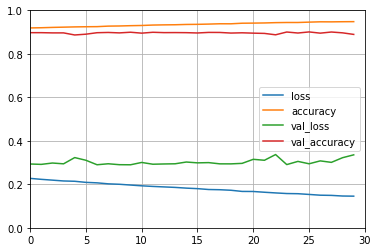

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.gca().set_xlim(0,30) #shift x axis for gaps
plt.show()

## Testing the the generalization error

In [82]:
model.evaluate(X_test, y_test) #evaluate the model's performance on the training data

10000/10000 [==============================] - 0s 42us/sample - loss: 104.7803 - accuracy: 0.8281


[104.78026002502442, 0.8281]

## Using the model to make predictions:



In [83]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2) # Shows the probability per class, each row in the array represents the vector of class values


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## To extract only the class values of the higest predicted prob

In [89]:
import numpy as np

In [91]:
y_pred = model.predict_classes(X_new)
y_pred
print(np.array(class_names)[y_pred]) #extrating the specific classes

['Ankle boot' 'Pullover' 'Trouser']


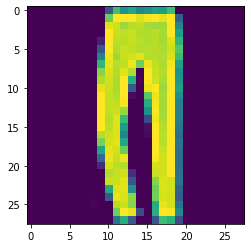

In [97]:
plt.imshow(X_new[2]) # visually show the values